Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 2 </h2>
    <h1> Pingüinos de Madagascar y los pingüinos perdidos </h1>
    <p>
        Profesor Vicente Domínguez<br>
        Primer semestre 2022    
    </p>
    <br>
    <img src="https://camo.githubusercontent.com/1d187452ac3929cfde8f5760b79f37cc117c1a332227d37a8c50db50d3db632a/68747470733a2f2f616c6c69736f6e686f7273742e6769746875622e696f2f70616c6d657270656e6775696e732f7265666572656e63652f666967757265732f6c7465725f70656e6775696e732e706e67" width="600"/>
</center>

<br>

---

# Indicaciones

Deberás entregar SOLO el archivo .ipynb en el buzón respectivo en canvas. 

**IMPORTANTE**: 
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.


## Librerías

Librerías aceptadas:
- `Numpy`
- `Pandas`
- `Matplotlib`
- `Seaborn`

Clases y funciones aceptadas de la librería `sklearn`:
- `DecisionTreeClassifier` y `plot_tree` del módulo `tree`
- `train_test_split` del módulo `model_selection`
- Funciones de los módulos `metrics` y `preprocessing`

Librerías y funciones prohibidas:
- Cualquier otra función de `sklearn`
- *Cualquier otra librería que maneje y prediga datos* 

<br>

---

# Introducción

Tu gran amigo Skipper y su equipo se encuentran en una misión super secreta para salvar a los pingüinos del malvado Dr. Espiráculo y su secuaz el Basado Vochi Doménguiz. Una vez que hayan terminado deberán reubicar los pingüinos con sus respectivas familias, es por esto que te pide a ti _-oh gran conocedor de los árboles de decisión y los ensambles-_ que implementes un programa que permita clasificar pingüinos para así reubicar a estos plumíferos en base a sus características.

<br>
<center>
<img src="https://misanimales.com/wp-content/uploads/2020/03/pinguinos-madagascar-768x549.jpg?auto=webp&quality=45&width=1920&crop=16:9,smart,safe" width="400"/>

## Descripción dataset

Para esta tarea utilizarás un dataset compuesto de información sobre pingüinos del archipiélago de Palmer. Estos datos fueron obtenidos a partir de [Kaggle](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_lter.csv) y después de ser preprocesados quedó la siguiente información:
- `species`: indica la especie a la que pertenece el pingüino. Este puede tomar 3 valores: Adelie Penguin (_Pygoscelis adeliae_), Chinstrap penguin (_Pygoscelis antarctica_), o Gentoo penguin (_Pygoscelis papua_).
- `culmen_length_mm`: longitud en milímetros del pico.
- `culmen_depth_mm`: profundidad en milímetros del pico.
- `flipper_length_mm`: longitud en milímetros de las aletas.
- `body_mass_g`: masa corporal en gramos.
- `island`: nombre de la isla donde se ubica. Este puede tomar 3 valores:  Dream, Torgersen, o Biscoe.
- `sex`: sexo del pingüino. Este puede tomar dos valores: _female_ o _male_. 
 
El dataset fue dividido en un set de entrenamiento y de testeo (_training_ and _testing_ sets), los cuales deberás utilizar de forma correcta a lo largo de toda tu tarea. 

# Parte 1: Preprocesamiento de los datos (0.5 ptos.)

A continuación, realiza el preprocesamiento de los datos y justifica las decisiones tomadas en el proceso.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
X_train = pd.read_csv('data/X_train.csv')
X_test  = pd.read_csv('data/X_test.csv')
y_test  = pd.read_csv('data/y_test.csv')
y_train = pd.read_csv('data/y_train.csv')

In [3]:
print('Null values in X_train: \n', X_train.isnull().sum(), '\n')
print('Null values in X_test: \n', X_test.isnull().sum(), '\n')

print(f'Balanceo de clases y_train clase {y_test.species.unique()[0]}: ', y_train[y_train.species == y_train.species.unique()[0]].shape[0] / y_train.shape[0])
print(f'Balanceo de clases y_train clase {y_test.species.unique()[1]}: ', y_train[y_train.species == y_train.species.unique()[1]].shape[0] / y_train.shape[0])
print(f'Balanceo de clases y_train clase {y_test.species.unique()[2]}: ', y_train[y_train.species == y_train.species.unique()[2]].shape[0] / y_train.shape[0], '\n')

print(f'Balanceo de clases y_test clase {y_test.species.unique()[0]}: ', y_test[y_test.species == y_test.species.unique()[0]].shape[0] / y_test.shape[0])
print(f'Balanceo de clases y_test clase {y_test.species.unique()[1]}: ', y_test[y_test.species == y_test.species.unique()[1]].shape[0] / y_test.shape[0])
print(f'Balanceo de clases y_test clase {y_test.species.unique()[2]}: ', y_test[y_test.species == y_test.species.unique()[2]].shape[0] / y_test.shape[0])

Null values in X_train: 
 culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
island               0
dtype: int64 

Null values in X_test: 
 culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
island               0
dtype: int64 

Balanceo de clases y_train clase Gentoo penguin (Pygoscelis papua):  0.3547008547008547
Balanceo de clases y_train clase Chinstrap penguin (Pygoscelis antarctica):  0.18803418803418803
Balanceo de clases y_train clase Adelie Penguin (Pygoscelis adeliae):  0.45726495726495725 

Balanceo de clases y_test clase Gentoo penguin (Pygoscelis papua):  0.37
Balanceo de clases y_test clase Chinstrap penguin (Pygoscelis antarctica):  0.24
Balanceo de clases y_test clase Adelie Penguin (Pygoscelis adeliae):  0.39


In [4]:
X_train.sex = (X_train.sex == 'Female').astype(int)
X_test.sex  = (X_test.sex  == 'Female').astype(int)

In [5]:
def encode_col(row, column, values):
    for value in values:
        row[value] = (row[column] == value).astype(int)
    return row


islands = X_train.island.unique()
X_train = X_train.groupby(X_train.index).apply(lambda row: encode_col(row, 'island', islands))
X_test  = X_test.groupby(X_test.index).apply(lambda row: encode_col(row,'island', islands))

del X_train['island']
del X_test['island']

# Parte 2: Árboles de decisión (1.5 ptos.)



Lo primero que debes realizar es implementar un árbol de decisión que permita clasificar los distintos tipos de pingüinos (`y`) en base a un set datos (`X`). 
 
Para esto deberás implementar una clase que tenga los métodos `fit` y `predict`:
- El método `fit` recibe un set `X` e `y`, donde `X` corresponde a un DataFrame e `y` es una serie con la clasificación de cada pingüino. A partir de estos datos, genera y almacena un árbol de decisión.
- El método `predict` solo recibe un set `X` (del mismo número de dimensiones que el usado para `fit`) y utiliza el árbol generado anteriormente para predecir la clase de cada dato de `X`.

El árbol implementado en esta primera parte **NO** debe presentar limitaciones en cuanto a la cantidad de niveles de profundidad que tenga.

In [6]:
from sklearn.tree import DecisionTreeClassifier

class DTC:
    def __init__(self, max_depth):
        self.model = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    
    def fit(self, X_train, y_train):
        return self.model.fit(X_train, y_train)
    
    def predict(self, X_test):
        return self.model.predict(X_test)

dt = DTC(None).fit(X_train, y_train)
preds = dt.predict(X_test)

Ahora, implementa un nuevo árbol de decisión (con los mismos métodos `fit` y `predict`), pero limita este árbol para que solo tenga **3 niveles de profundidad.** 

In [7]:
dt_limited = DTC(3).fit(X_train, y_train)
preds_limited = dt_limited.predict(X_test)

A partir de la implementación de ambos árboles de decisión, responde la siguiente pregunta:
> ¿Cuál de los árboles de decisión generó mejores resultados? <br> Justifique su respuesta en base a los resultados del _testing set_ y el uso de métricas de evaluación.  

Respuesta: En este caso observando las matrices de confusión es posible observar que dio mejores resultados el árbol sin límites de maximo crecimiento. Yo creo que dependiendo del problema, tamaño del set de testeo y max depth elegido es posible que estos resultados varien, y que no siempre dara mejores resultados a la hora de generalizar en nuevos datos utilizar un max_depth no limitado.

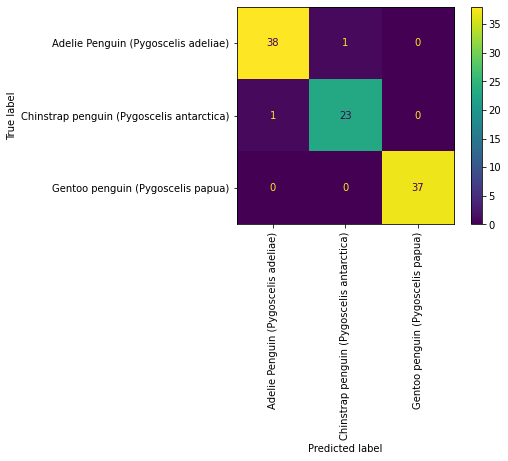

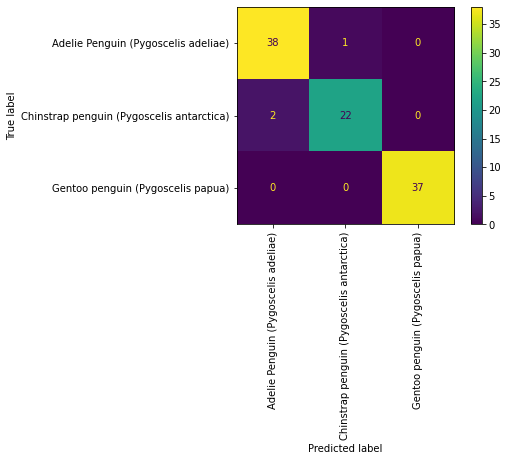

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, preds, xticks_rotation='vertical')
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, preds_limited, xticks_rotation='vertical')
plt.show()

# Parte 3: Random Forest (4 ptos.)

A continuación deberas implementar un _Random Forest_ compuesto por 3 árboles de decisión.
 
Para ello deberás crear la clase `RandomForest` que deberá contener los métodos `fit`, `calculate_oob` y `predict`:
- El método `fit` recibe un set `X` e `y`, donde `X` corresponde a un DataFrame e `y` es una serie con la clasificación de cada pingüino. A partir de estos datos, la función genera y almacena los árboles de decisión asociados al _random forest_.
Al momento de generar cada árbol de decisión, deberás realizar lo siguiente:
    1. Para cada árbol a generar:
        1. Obtener un _sample_ aleatorio de 5 de las _features_ que componen `X`.
        2. Separa los datos contenidos en `X` e `y` en un set de entrenamiento y otro de testeo.
        3. Entrenar el árbol de decisión, en base al set de entrenamiento obtenido en el paso anterior.
        4. Almacenar el árbol generado.
    2. Calcula el OOB error del árbol.
- El método `calculate_oob`, calcula el _Out-of-bag error_ del Random Forest. 
- El método `predict` recibe un set `X` (del mismo número de dimensiones que el usado para `fit`) y a partir de los árboles de decisión generados predice la clase a la que pertenece de cada dato de `X`.


In [9]:
class RandomForest:
    def __init__(self):
        self.trees = []
        self.tree_cols = []
    
    def calculate_oob(self):
        for oB, oB_index in zip(self.OuterBag, self.OuterBag_index):
            
            preds = []
            for i in oB_index:
                
                
                votes = []
                for _oB_index, tree, columns in zip(self.OuterBag_index, self.trees, self.tree_cols):
                    if i in _oB_index:
                        
                        # Que vote el arbol
                        
                        votes.append(tree.predict(self.X[self.X.index == i][columns])[0])
                #codigo sacado de stack overlflow, útil para obtener el voto que más se repite
                unique, pos = np.unique(votes, return_inverse=True) #Finds all unique elements and their positions
                counts = np.bincount(pos)                     #Count the number of each unique element
                maxpos = counts.argmax()                      #Finds the positions of the maximum count

                preds.append(unique[maxpos])
                
            real = oB[1].values
            real = [r[0] for r in real]
            preds = np.asarray(preds)
            print('OOB score:', len([1 for x,y in zip(real, preds) if x == y]),'de', len(real), 'correctos')
    
    def fit(self, X, y):
        self.trees = []
        self.OuterBag = []
        self.OuterBag_index = []
        self.X = X
        self.y = y
        
        for i in range(3):
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
            
            columns_sample = np.random.choice(X.columns, np.random.randint(1, X.columns.shape[0]))
            
            _X_train = X_train[columns_sample]
            _X_test  = X_test[columns_sample]
            
            self.trees.append(DTC(3).fit(_X_train, y_train))
            self.tree_cols.append(columns_sample)
            
            self.OuterBag_index.append( _X_test.index)
            self.OuterBag.append([_X_test, y_test])
            
        self.calculate_oob() 
                
    def predict(self, X):
        
        preds = []
        
        for tree, columns in zip(self.trees, self.tree_cols):
            _X = X[columns]
            preds.append(tree.predict(_X))
        
        votes = []
        
        for j in range(X.shape[0]):
            
            v = []
            for i in range(len(self.trees)):
                v.append(preds[i][j])
            votes.append(v)
        
        final_preds = []
        for v in votes:
            
            unique, pos = np.unique(v, return_inverse=True) #Finds all unique elements and their positions
            counts = np.bincount(pos)                     #Count the number of each unique element
            maxpos = counts.argmax()                      #Finds the positions of the maximum count

            final_preds.append(unique[maxpos])
        return final_preds
    
_rf = RandomForest()
_rf.fit(X_train, y_train)       
_preds =_rf.predict(X_test)

OOB score: 60 de 78 correctos
OOB score: 58 de 78 correctos
OOB score: 67 de 78 correctos


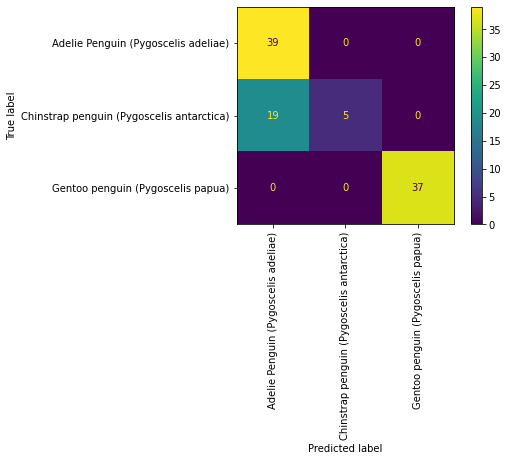

In [10]:
ConfusionMatrixDisplay.from_predictions(y_test, _preds, xticks_rotation='vertical')
plt.show()

A partir de la implementación del _Random Forest_, responde las siguientes preguntas:
> 1. ¿Cuál fue el _Out-of-bag error_ obtenido? ¿Qué se puede hacer para mejorar este valor?

Respuesta: Tras correr el código multiples veces el Out-of-bag error se mantuvo bastante bueno (aproximadamente entre 15/78 predicciones fallaban por árbol). Creo que para mejorar esto es necesario aumentar la cantidad de árboles para así disminuir la varianza de la cantidad de árboles que pueden participar en la predicción de un dato que no usaron para entrenar.

> 2. Comparando con los resultados, ¿qué método dio mejores resultados?  <br> Justifique su respuesta en base a los resultados del _testing set_ y el uso de métricas de evaluación.  


Respuesta: En comparación a los árboles de decisión los resultados se mantuvieron muy similares (quiza un poco peor, pero muy ligeramente). Creo que si tuvieramos un dataset de testeo mayor y un mayor número de arboles de desición en el random forest, entonces utilizar random forest daría mejores resultados.

# Bonus

Esta tarea cuenta con una serie de bonus a los que podrás optar. Cabe recalcar que para optar a estos beneficios la nota de tu tarea (sin bonus) debe ser **igual o superior a 3,95** (sin considerar posibles descuentos).

## Meme (1-2 décimas)

Haga un meme relacionado a la material del curso. Si es bueno, podrá optar a décimas extra. 

In [12]:
# He aquí mi meme :D
# https://imgur.com/gallery/WDHnK47

## Random Forest Parámetrizado (3 décimas)

A partir del código implementado anteriormente, genere una nueva clase que permita un _Random Forest_ donde los siguientes valores sean **variables de instancia** de clase y, que a su vez, permitan modificar el comportamiento del algoritmo:
- `tree_numbers`: int que indica la cantidad de árboles por la que estará compuesto el Random Forest.
- `n_features`: int que indica la cantidad de _features_ a considerar para generar el _sample_ de cada árbol de decisión.
- `criterion`: string que indica la función a utilizar para medir la calidad de un _split_.
- `max_depth`: int que indica la profundidad máxima de los árboles.
- `min_sample_split`: int o float que indica la cantidad mínima de _samples_ requeridos para dividir un nodo de los árboles. 
- `max_features`: int, float o string que indica la cantidad de _features_ a considerar al momento de generar el árbol. 
 
A excepción de `tree_numbers` y `n_features` todas estas variables deben ser opcionales, por lo que queda a tu criterio los valores por defecto a utilizar en cada caso. <br><br>

Para obtener este beneficio, el bonus debe estar implementado en su totalidad, ya que no se entregará puntaje intermedio. 

In [11]:
class DTC_Parametrizado:
    def __init__(self, max_depth, criterion, min_sample_split, max_features):
        self.model = DecisionTreeClassifier(max_depth = max_depth, random_state=0, criterion=criterion, min_samples_split=min_sample_split, max_features=max_features)
    
    def fit(self, X_train, y_train):
        return self.model.fit(X_train, y_train)
    
    def predict(self, X_test):
        return self.model.predict(X_test)


class RandomForest_Parametrizado:
    def __init__(self, tree_numbers, n_features, max_depth, criterion, min_sample_split, max_features):
        self.trees = []
        self.tree_cols = []
        self.tree_numbers = tree_numbers
        self.n_features = n_features
        self.max_depth = max_depth
        self.criterion = criterion
        self.min_sample_split = min_sample_split
        self.max_features = max_features
    def calculate_oob(self):
        for oB, oB_index in zip(self.OuterBag, self.OuterBag_index):
            
            preds = []
            for i in oB_index:
                
                
                votes = []
                for _oB_index, tree, columns in zip(self.OuterBag_index, self.trees, self.tree_cols):
                    if i in _oB_index:
                        
                        # Que vote el arbol
                        
                        votes.append(tree.predict(self.X[self.X.index == i][columns])[0])
                # Estas 3 lineas de abajo son un codigo sacado de stack overlflow, me fue útil para obtener la decision más votada
                unique, pos = np.unique(votes, return_inverse=True) #Finds all unique elements and their positions
                counts = np.bincount(pos)                     #Count the number of each unique element
                maxpos = counts.argmax()                      #Finds the positions of the maximum count

                preds.append(unique[maxpos])
                
            real = oB[1].values
            real = [r[0] for r in real]
            preds = np.asarray(preds)
            print('OOB score:', len([1 for x,y in zip(real, preds) if x == y]),'de', len(real), 'correctos')
    
    def fit(self, X, y):
        self.trees = []
        self.OuterBag = []
        self.OuterBag_index = []
        self.X = X
        self.y = y
        
        for i in range(self.tree_numbers):
            
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
            
            columns_sample = np.random.choice(X.columns, self.n_features)
            
            _X_train = X_train[columns_sample]
            _X_test  = X_test[columns_sample]
            
            self.trees.append(DTC_Parametrizado(self.max_depth, self.criterion, self.min_sample_split, self.max_features).fit(_X_train, y_train))
            self.tree_cols.append(columns_sample)
            
            self.OuterBag_index.append( _X_test.index)
            self.OuterBag.append([_X_test, y_test])
            
        self.calculate_oob() 
                
    def predict(self, X):
        
        preds = []
        
        for tree, columns in zip(self.trees, self.tree_cols):
            _X = X[columns]
            preds.append(tree.predict(_X))
        
        votes = []
        
        for j in range(X.shape[0]):
            
            v = []
            for i in range(len(self.trees)):
                v.append(preds[i][j])
            votes.append(v)
        
        final_preds = []
        for v in votes:
            # Estas 3 lineas de abajo son un codigo sacado de stack overlflow, me fue útil para obtener la decision más votada
            unique, pos = np.unique(v, return_inverse=True) #Finds all unique elements and their positions
            counts = np.bincount(pos)                       #Count the number of each unique element
            maxpos = counts.argmax()                        #Finds the positions of the maximum count

            final_preds.append(unique[maxpos])
        return final_preds